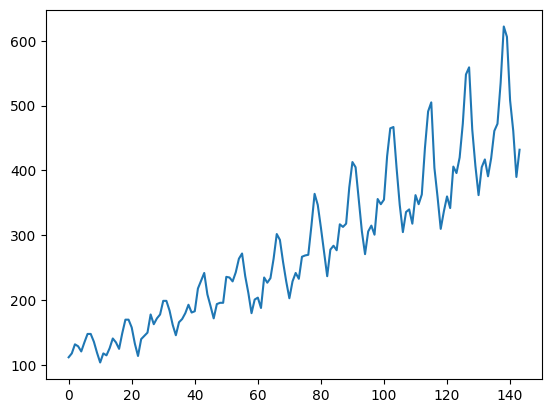

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()


In [2]:
dataset

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

In [5]:
dataset1 = dataset.values
dataset1 = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)

In [7]:
# split into train and test sets
train_size = int(len(dataset1) * 0.67)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset1, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset1)-look_back-1):
		a = dataset1[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset1[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0479 - 2s/epoch - 24ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0257 - 165ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0177 - 168ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0158 - 176ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0150 - 166ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0143 - 166ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0132 - 160ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0122 - 159ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0113 - 161ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0104 - 165ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0094 - 163ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0086 - 161ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0075 - 156ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0067 - 166ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0059 - 158ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0050 - 176ms/epoc

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 8ms/step
Train Score: 23.60 RMSE
Test Score: 51.75 RMSE


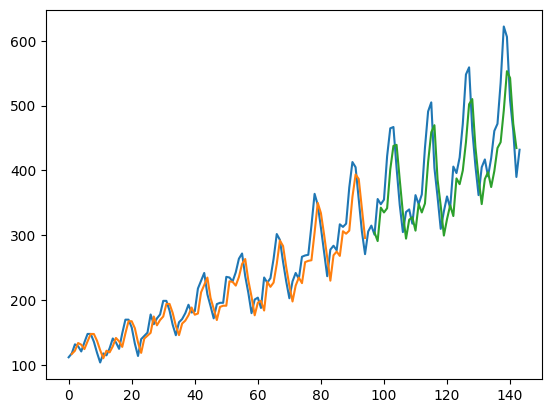

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset1)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()